In [1]:
import copy

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from astropy.io import fits
from astropy.table import Table

plt.rcParams["axes.labelsize"] = 25
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["xtick.labelsize"] = 25
plt.rcParams["ytick.labelsize"] = 25
plt.rcParams["figure.figsize"] = (11, 7)

In [2]:
data = Table.read("../data/bprp_apogee.fits").to_pandas().dropna()

In [3]:
data_ages = fits.open("../data/apogee_astroNN-DR17.fits.1")[1].data

In [4]:
cols = [
    "TEFF",
    "TEFF_ERR",
    "LOGG",
    "LOGG_ERR",
    "C_H",
    "C_H_ERR",
    "CI_H",
    "CI_H_ERR",
    "N_H",
    "N_H_ERR",
    "O_H",
    "O_H_ERR",
    "NA_H",
    "NA_H_ERR",
    "MG_H",
    "MG_H_ERR",
    "AL_H",
    "AL_H_ERR",
    "SI_H",
    "SI_H_ERR",
    "P_H",
    "P_H_ERR",
    "S_H",
    "S_H_ERR",
    "K_H",
    "K_H_ERR",
    "CA_H",
    "CA_H_ERR",
    "TI_H",
    "TI_H_ERR",
    "TIII_H",
    "TIII_H_ERR",
    "V_H",
    "V_H_ERR",
    "CR_H",
    "CR_H_ERR",
    "MN_H",
    "MN_H_ERR",
    "FE_H",
    "FE_H_ERR",
    "CO_H",
    "CO_H_ERR",
    "NI_H",
    "NI_H_ERR",
    "age",
    "age_total_error",
]

df_ages = pd.DataFrame(
    np.stack(
        (
            data_ages["source_id"],
            *[data_ages[i].astype("float32") for i in cols],
        )
    ).T
)
df_ages.columns = ["source_id"] + cols

In [5]:
data = data.drop(["fe_h", "alpha_m", "logg", "teff", "m_h"], axis=1)
data = pd.merge(
    data.drop_duplicates(), df_ages.drop_duplicates(), on="source_id"
).dropna()
data = data[data["LOGG"] < 3.5]
data = data[data["LOGG_ERR"] < 0.12]
data = data[(data["age_total_error"] / data["age"]) < 0.3]
data = data[
    (data["sfd_ebv"] < 0.1) & (data["FE_H"] > -5.0)
]  # consider cuts on other parameters?

In [6]:
names_X = [
    "bp_1",
    "bp_2",
    "bp_3",
    "bp_4",
    "bp_5",
    "bp_6",
    "bp_7",
    "bp_8",
    "bp_9",
    "bp_10",
    "bp_11",
    "bp_12",
    "bp_13",
    "bp_14",
    "bp_15",
    "bp_16",
    "bp_17",
    "bp_18",
    "bp_19",
    "bp_20",
    "bp_21",
    "bp_22",
    "bp_23",
    "bp_24",
    "bp_25",
    "bp_26",
    "bp_27",
    "bp_28",
    "bp_29",
    "bp_30",
    "bp_31",
    "bp_32",
    "bp_33",
    "bp_34",
    "bp_35",
    "bp_36",
    "bp_37",
    "bp_38",
    "bp_39",
    "bp_40",
    "bp_41",
    "bp_42",
    "bp_43",
    "bp_44",
    "bp_45",
    "bp_46",
    "bp_47",
    "bp_48",
    "bp_49",
    "bp_50",
    "bp_51",
    "bp_52",
    "bp_53",
    "bp_54",
    "bp_55",
    "rp_1",
    "rp_2",
    "rp_3",
    "rp_4",
    "rp_5",
    "rp_6",
    "rp_7",
    "rp_8",
    "rp_9",
    "rp_10",
    "rp_11",
    "rp_12",
    "rp_13",
    "rp_14",
    "rp_15",
    "rp_16",
    "rp_17",
    "rp_18",
    "rp_19",
    "rp_20",
    "rp_21",
    "rp_22",
    "rp_23",
    "rp_24",
    "rp_25",
    "rp_26",
    "rp_27",
    "rp_28",
    "rp_29",
    "rp_30",
    "rp_31",
    "rp_32",
    "rp_33",
    "rp_34",
    "rp_35",
    "rp_36",
    "rp_37",
    "rp_38",
    "rp_39",
    "rp_40",
    "rp_41",
    "rp_42",
    "rp_43",
    "rp_44",
    "rp_45",
    "rp_46",
    "rp_47",
    "rp_48",
    "rp_49",
    "rp_50",
    "rp_51",
    "rp_52",
    "rp_53",
    "rp_54",
    "rp_55",
]
names_eX = [
    "bpe_1",
    "bpe_2",
    "bpe_3",
    "bpe_4",
    "bpe_5",
    "bpe_6",
    "bpe_7",
    "bpe_8",
    "bpe_9",
    "bpe_10",
    "bpe_11",
    "bpe_12",
    "bpe_13",
    "bpe_14",
    "bpe_15",
    "bpe_16",
    "bpe_17",
    "bpe_18",
    "bpe_19",
    "bpe_20",
    "bpe_21",
    "bpe_22",
    "bpe_23",
    "bpe_24",
    "bpe_25",
    "bpe_26",
    "bpe_27",
    "bpe_28",
    "bpe_29",
    "bpe_30",
    "bpe_31",
    "bpe_32",
    "bpe_33",
    "bpe_34",
    "bpe_35",
    "bpe_36",
    "bpe_37",
    "bpe_38",
    "bpe_39",
    "bpe_40",
    "bpe_41",
    "bpe_42",
    "bpe_43",
    "bpe_44",
    "bpe_45",
    "bpe_46",
    "bpe_47",
    "bpe_48",
    "bpe_49",
    "bpe_50",
    "bpe_51",
    "bpe_52",
    "bpe_53",
    "bpe_54",
    "bpe_55",
    "rpe_1",
    "rpe_2",
    "rpe_3",
    "rpe_4",
    "rpe_5",
    "rpe_6",
    "rpe_7",
    "rpe_8",
    "rpe_9",
    "rpe_10",
    "rpe_11",
    "rpe_12",
    "rpe_13",
    "rpe_14",
    "rpe_15",
    "rpe_16",
    "rpe_17",
    "rpe_18",
    "rpe_19",
    "rpe_20",
    "rpe_21",
    "rpe_22",
    "rpe_23",
    "rpe_24",
    "rpe_25",
    "rpe_26",
    "rpe_27",
    "rpe_28",
    "rpe_29",
    "rpe_30",
    "rpe_31",
    "rpe_32",
    "rpe_33",
    "rpe_34",
    "rpe_35",
    "rpe_36",
    "rpe_37",
    "rpe_38",
    "rpe_39",
    "rpe_40",
    "rpe_41",
    "rpe_42",
    "rpe_43",
    "rpe_44",
    "rpe_45",
    "rpe_46",
    "rpe_47",
    "rpe_48",
    "rpe_49",
    "rpe_50",
    "rpe_51",
    "rpe_52",
    "rpe_53",
    "rpe_54",
    "rpe_55",
]
names_Y = ["FE_H", "MG_H", "LOGG", "TEFF", "age"]
# names_Y = ["alpha_m"]
names_norm = ["gaiaedr3_phot_g_mean_mag"]

In [7]:
normalize = lambda x, n: x / (10 ** (8.5 - n / 2.5))

In [173]:
from sklearn.model_selection import train_test_split


def split_arrays(*arrays, test_size, valid_size=0):
    """
    Split arrays into train, test and (optionally) validation sets.

    Parameters
    ----------
    *arrays : list of arrays
        Arrays to split.
    test_size : float
        Fraction of the data to be used for testing.
    valid_size : float, optional
        Fraction of the remaining data to be used for validation.

    Returns
    -------
    train, test, valid : tuple of list of arrays, where each list
        is the same length as the input arrays.
    """
    split = train_test_split(*arrays, test_size=test_size)
    train_arrays = split[::2]
    test_arrays = split[1::2]

    if valid_size > 0:
        split_valid = train_test_split(*train_arrays, test_size=valid_size)
        train_arrays = split_valid[::2]
        valid_arrays = split_valid[1::2]

        return train_arrays, test_arrays, valid_arrays

    return train_arrays, test_arrays

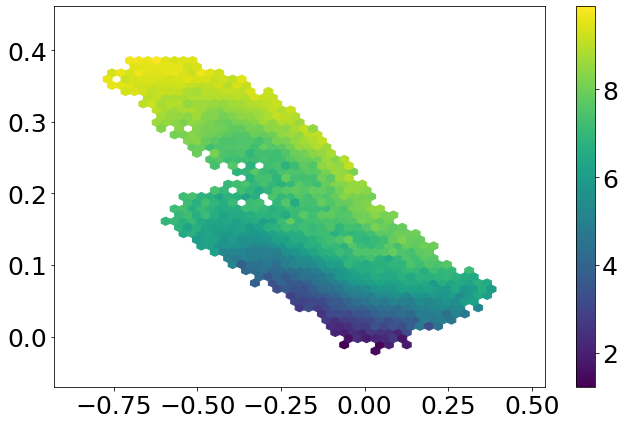

In [174]:
plt.hexbin(
    data["FE_H"], data["MG_H"] - data["FE_H"], C=data["age"], gridsize=50, mincnt=5
)
plt.colorbar()

In [190]:
features = normalize(data[names_X].to_numpy(), data[names_norm].to_numpy())
efeatures = normalize(data[names_eX].to_numpy(), data[names_norm].to_numpy())
labels = data[names_Y].to_numpy()
labels[:, -1] = np.log(labels[:, -1])  # log ages
labels[:, 1] = labels[:, 1] - labels[:, 0]  # turn mg/h into mg/fe

train, test, valid = split_arrays(
    features,
    efeatures,
    labels,
    elabels,
    test_size=0.2,
    valid_size=0.2,
)

In [193]:
from warnings import catch_warnings, simplefilter, warn

import numpy as np
from joblib import Parallel, delayed
from numba import jit, njit, prange
from scipy.sparse import issparse
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble._forest import _generate_sample_indices, _get_n_samples_bootstrap
from sklearn.exceptions import DataConversionWarning
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree._tree import DOUBLE, DTYPE
from sklearn.utils import check_random_state, compute_sample_weight
from sklearn.utils.fixes import delayed
from sklearn.utils.multiclass import type_of_target
from sklearn.utils.validation import _check_sample_weight
from tqdm.auto import tqdm

MAX_INT = np.iinfo(np.int32).max


def _parallel_build_trees(
    tree,
    forest,
    X,
    y,
    sample_weight,
    tree_idx,
    n_trees,
    verbose=0,
    class_weight=None,
    n_samples_bootstrap=None,
):
    """
    Private function used to fit a single tree in parallel."""
    if verbose > 1:
        print("building tree %d of %d" % (tree_idx + 1, n_trees))

    if forest.bootstrap:
        n_samples = X.shape[0]
        if sample_weight is None:
            curr_sample_weight = np.ones((n_samples,), dtype=np.float64)
        else:
            curr_sample_weight = sample_weight.copy()

        indices = _generate_sample_indices(
            tree.random_state, n_samples, n_samples_bootstrap
        )
        sample_counts = np.bincount(indices, minlength=n_samples)
        curr_sample_weight *= sample_counts

        if class_weight == "subsample":
            with catch_warnings():
                simplefilter("ignore", DeprecationWarning)
                curr_sample_weight *= compute_sample_weight("auto", y, indices=indices)
        elif class_weight == "balanced_subsample":
            curr_sample_weight *= compute_sample_weight("balanced", y, indices=indices)

        tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
    else:
        tree.fit(X, y, sample_weight=sample_weight, check_input=False)

    return tree


class IdentityScaler:
    def __init__(self):
        return None

    def transform(self, x):
        return x

    def inverse_transform(self, x):
        return x

    def fit(self, x):
        pass


class ProbabilisticRandomForestRegressor(RandomForestRegressor):
    """
    A probabilistic random forest regressor.

    A random forest is a meta estimator that fits a number of classifying
    decision trees on various sub-samples of the dataset and uses averaging
    to improve the predictive accuracy and control over-fitting.
    The sub-sample size is controlled with the `max_samples` parameter if
    `bootstrap=True` (default), otherwise the whole dataset is used to build
    each tree.

    Read more in the :ref:`User Guide <forest>`.

    Parameters
    ----------
    n_estimators : int, default=100
        The number of trees in the forest.

        .. versionchanged:: 0.22
           The default value of ``n_estimators`` changed from 10 to 100
           in 0.22.

    criterion : {"squared_error", "absolute_error", "poisson"}, \
            default="squared_error"
        The function to measure the quality of a split. Supported criteria
        are "squared_error" for the mean squared error, which is equal to
        variance reduction as feature selection criterion, "absolute_error"
        for the mean absolute error, and "poisson" which uses reduction in
        Poisson deviance to find splits.
        Training using "absolute_error" is significantly slower
        than when using "squared_error".

        .. versionadded:: 0.18
           Mean Absolute Error (MAE) criterion.

        .. versionadded:: 1.0
           Poisson criterion.

        .. deprecated:: 1.0
            Criterion "mse" was deprecated in v1.0 and will be removed in
            version 1.2. Use `criterion="squared_error"` which is equivalent.

        .. deprecated:: 1.0
            Criterion "mae" was deprecated in v1.0 and will be removed in
            version 1.2. Use `criterion="absolute_error"` which is equivalent.

    max_depth : int, default=None
        The maximum depth of the tree. If None, then nodes are expanded until
        all leaves are pure or until all leaves contain less than
        min_samples_split samples.

    min_samples_split : int or float, default=2
        The minimum number of samples required to split an internal node:

        - If int, then consider `min_samples_split` as the minimum number.
        - If float, then `min_samples_split` is a fraction and
          `ceil(min_samples_split * n_samples)` are the minimum
          number of samples for each split.

        .. versionchanged:: 0.18
           Added float values for fractions.

    min_samples_leaf : int or float, default=1
        The minimum number of samples required to be at a leaf node.
        A split point at any depth will only be considered if it leaves at
        least ``min_samples_leaf`` training samples in each of the left and
        right branches.  This may have the effect of smoothing the model,
        especially in regression.

        - If int, then consider `min_samples_leaf` as the minimum number.
        - If float, then `min_samples_leaf` is a fraction and
          `ceil(min_samples_leaf * n_samples)` are the minimum
          number of samples for each node.

        .. versionchanged:: 0.18
           Added float values for fractions.

    min_weight_fraction_leaf : float, default=0.0
        The minimum weighted fraction of the sum total of weights (of all
        the input samples) required to be at a leaf node. Samples have
        equal weight when sample_weight is not provided.

    max_features : {"auto", "sqrt", "log2"}, int or float, default="auto"
        The number of features to consider when looking for the best split:

        - If int, then consider `max_features` features at each split.
        - If float, then `max_features` is a fraction and
          `round(max_features * n_features)` features are considered at each
          split.
        - If "auto", then `max_features=n_features`.
        - If "sqrt", then `max_features=sqrt(n_features)`.
        - If "log2", then `max_features=log2(n_features)`.
        - If None, then `max_features=n_features`.

        Note: the search for a split does not stop until at least one
        valid partition of the node samples is found, even if it requires to
        effectively inspect more than ``max_features`` features.

    max_leaf_nodes : int, default=None
        Grow trees with ``max_leaf_nodes`` in best-first fashion.
        Best nodes are defined as relative reduction in impurity.
        If None then unlimited number of leaf nodes.

    min_impurity_decrease : float, default=0.0
        A node will be split if this split induces a decrease of the impurity
        greater than or equal to this value.

        The weighted impurity decrease equation is the following::

            N_t / N * (impurity - N_t_R / N_t * right_impurity
                                - N_t_L / N_t * left_impurity)

        where ``N`` is the total number of samples, ``N_t`` is the number of
        samples at the current node, ``N_t_L`` is the number of samples in the
        left child, and ``N_t_R`` is the number of samples in the right child.

        ``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,
        if ``sample_weight`` is passed.

        .. versionadded:: 0.19

    bootstrap : bool, default=True
        Whether bootstrap samples are used when building trees. If False, the
        whole dataset is used to build each tree.

    oob_score : bool, default=False
        Whether to use out-of-bag samples to estimate the generalization score.
        Only available if bootstrap=True.

    n_jobs : int, default=-1
        The number of jobs to run in parallel. :meth:`fit`, :meth:`predict`,
        :meth:`decision_path` and :meth:`apply` are all parallelized over the
        trees. ``None`` means 1 unless in a :obj:`joblib.parallel_backend`
        context. ``-1`` means using all processors. See :term:`Glossary
        <n_jobs>` for more details.

    random_state : int, RandomState instance or None, default=None
        Controls both the randomness of the bootstrapping of the samples used
        when building trees (if ``bootstrap=True``) and the sampling of the
        features to consider when looking for the best split at each node
        (if ``max_features < n_features``).
        See :term:`Glossary <random_state>` for details.

    verbose : int, default=0
        Controls the verbosity when fitting and predicting.

    warm_start : bool, default=False
        When set to ``True``, reuse the solution of the previous call to fit
        and add more estimators to the ensemble, otherwise, just fit a whole
        new forest. See :term:`the Glossary <warm_start>`.

    ccp_alpha : non-negative float, default=0.0
        Complexity parameter used for Minimal Cost-Complexity Pruning. The
        subtree with the largest cost complexity that is smaller than
        ``ccp_alpha`` will be chosen. By default, no pruning is performed. See
        :ref:`minimal_cost_complexity_pruning` for details.

        .. versionadded:: 0.22

    max_samples : int or float, default=None
        If bootstrap is True, the number of samples to draw from X
        to train each base estimator.

        - If None (default), then draw `X.shape[0]` samples.
        - If int, then draw `max_samples` samples.
        - If float, then draw `max_samples * X.shape[0]` samples. Thus,
          `max_samples` should be in the interval `(0.0, 1.0]`.

        .. versionadded:: 0.22

    Attributes
    ----------
    base_estimator_ : DecisionTreeRegressor
        The child estimator template used to create the collection of fitted
        sub-estimators.

    estimators_ : list of DecisionTreeRegressor
        The collection of fitted sub-estimators.

    feature_importances_ : ndarray of shape (n_features,)
        The impurity-based feature importances.
        The higher, the more important the feature.
        The importance of a feature is computed as the (normalized)
        total reduction of the criterion brought by that feature.  It is also
        known as the Gini importance.

        Warning: impurity-based feature importances can be misleading for
        high cardinality features (many unique values). See
        :func:`sklearn.inspection.permutation_importance` as an alternative.

    n_features_ : int
        The number of features when ``fit`` is performed.

        .. deprecated:: 1.0
            Attribute `n_features_` was deprecated in version 1.0 and will be
            removed in 1.2. Use `n_features_in_` instead.

    n_features_in_ : int
        Number of features seen during :term:`fit`.

        .. versionadded:: 0.24

    feature_names_in_ : ndarray of shape (`n_features_in_`,)
        Names of features seen during :term:`fit`. Defined only when `X`
        has feature names that are all strings.

        .. versionadded:: 1.0

    n_outputs_ : int
        The number of outputs when ``fit`` is performed.

    oob_score_ : float
        Score of the training dataset obtained using an out-of-bag estimate.
        This attribute exists only when ``oob_score`` is True.

    oob_prediction_ : ndarray of shape (n_samples,) or (n_samples, n_outputs)
        Prediction computed with out-of-bag estimate on the training set.
        This attribute exists only when ``oob_score`` is True.


    See Also
    --------
    sklearn.tree.DecisionTreeRegressor : A decision tree regressor.
    sklearn.ensemble.ExtraTreesRegressor : Ensemble of extremely randomized
        tree regressors.

    Notes
    -----
    The default values for the parameters controlling the size of the trees
    (e.g. ``max_depth``, ``min_samples_leaf``, etc.) lead to fully grown and
    unpruned trees which can potentially be very large on some data sets. To
    reduce memory consumption, the complexity and size of the trees should be
    controlled by setting those parameter values.

    The features are always randomly permuted at each split. Therefore,
    the best found split may vary, even with the same training data,
    ``max_features=n_features`` and ``bootstrap=False``, if the improvement
    of the criterion is identical for several splits enumerated during the
    search of the best split. To obtain a deterministic behaviour during
    fitting, ``random_state`` has to be fixed.

    The default value ``max_features="auto"`` uses ``n_features``
    rather than ``n_features / 3``. The latter was originally suggested in
    [1], whereas the former was more recently justified empirically in [2].
    """

    scaler: StandardScaler
    scaler_is_trained: bool

    def __init__(
        self,
        n_estimators=100,
        *,
        criterion="squared_error",
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.0,
        max_features=1.0,
        max_leaf_nodes=None,
        min_impurity_decrease=0.0,
        bootstrap=True,
        oob_score=False,
        n_jobs=None,
        random_state=None,
        verbose=0,
        warm_start=False,
        ccp_alpha=0.0,
        max_samples=None,
    ):
        super().__init__(
            n_estimators=n_estimators,
            criterion=criterion,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            min_weight_fraction_leaf=min_weight_fraction_leaf,
            max_features=max_features,
            max_leaf_nodes=max_leaf_nodes,
            min_impurity_decrease=min_impurity_decrease,
            bootstrap=bootstrap,
            oob_score=oob_score,
            n_jobs=-1 if n_jobs is None else n_jobs,
            random_state=random_state,
            verbose=verbose,
            warm_start=warm_start,
            ccp_alpha=ccp_alpha,
            max_samples=max_samples,
        )
        self.scaler = StandardScaler()
        self.scaler_is_trained = False

    def fit(self, X, y, eX=0.0, eY=0.0, sample_weight=None, leave_pbar=True):
        """
        Build a forest of trees from the training set (X, y).

        Parameters
        ----------
        X : {array-like, sparse matrix} of shape (n_samples, n_features)
            The training input samples. Internally, its dtype will be converted
            to ``dtype=np.float32``. If a sparse matrix is provided, it will be
            converted into a sparse ``csc_matrix``.

        y : array-like of shape (n_samples,) or (n_samples, n_outputs)
            The target values (class labels in classification, real numbers in
            regression).

        eX : array-like of shape (n_samples, n_features) or float, default=0.
             The Gaussian uncertainty/error on the training input samples. If an array-like,
                it must be the same shape as ``X``. If a float, it is broadcasted to have the
                same shape as ``X``.

        sample_weight : array-like of shape (n_samples,), default=None
            Sample weights. If None, then samples are equally weighted. Splits
            that would create child nodes with net zero or negative weight are
            ignored while searching for a split in each node. In the case of
            classification, splits are also ignored if they would result in any
            single class carrying a negative weight in either child node.

        leave_pbar : bool, default=True
            Whether to leave the progress bar that is shown while fitting the model when finished.

        Returns
        -------
        self : object
            Fitted estimator.
        """
        # Validate or convert input data
        if issparse(y):
            raise ValueError("sparse multilabel-indicator for y is not supported.")
        X, y = self._validate_data(
            X, y, multi_output=True, accept_sparse="csc", dtype=DTYPE
        )
        if sample_weight is not None:
            sample_weight = _check_sample_weight(sample_weight, X)

        if issparse(X):
            # Pre-sort indices to avoid that each individual tree of the
            # ensemble sorts the indices.
            X.sort_indices()

        y = np.atleast_1d(y)
        if y.ndim == 2 and y.shape[1] == 1:
            warn(
                "A column-vector y was passed when a 1d array was"
                " expected. Please change the shape of y to "
                "(n_samples,), for example using ravel().",
                DataConversionWarning,
                stacklevel=2,
            )

        if y.ndim == 1:
            # reshape is necessary to preserve the data contiguity against vs
            # [:, np.newaxis] that does not.
            y = np.reshape(y, (-1, 1))

        if self.criterion == "poisson":
            if np.any(y < 0):
                raise ValueError(
                    "Some value(s) of y are negative which is "
                    "not allowed for Poisson regression."
                )
            if np.sum(y) <= 0:
                raise ValueError(
                    "Sum of y is not strictly positive which "
                    "is necessary for Poisson regression."
                )

        self.n_outputs_ = y.shape[1]

        y, expanded_class_weight = self._validate_y_class_weight(y)

        if getattr(y, "dtype", None) != DOUBLE or not y.flags.contiguous:
            y = np.ascontiguousarray(y, dtype=DOUBLE)

        if expanded_class_weight is not None:
            if sample_weight is not None:
                sample_weight = sample_weight * expanded_class_weight
            else:
                sample_weight = expanded_class_weight

        if not self.bootstrap and self.max_samples is not None:
            raise ValueError(
                "`max_sample` cannot be set if `bootstrap=False`. "
                "Either switch to `bootstrap=True` or set "
                "`max_sample=None`."
            )
        elif self.bootstrap:
            n_samples_bootstrap = _get_n_samples_bootstrap(
                n_samples=X.shape[0], max_samples=self.max_samples
            )
        else:
            n_samples_bootstrap = None

        # Check parameters
        self._validate_estimator()

        if not self.bootstrap and self.oob_score:
            raise ValueError("Out of bag estimation only available if bootstrap=True")

        random_state = check_random_state(self.random_state)

        if not self.warm_start or not hasattr(self, "estimators_"):
            # Free allocated memory, if any
            self.estimators_ = []

        n_more_estimators = self.n_estimators - len(self.estimators_)

        if n_more_estimators < 0:
            raise ValueError(
                "n_estimators=%d must be larger or equal to "
                "len(estimators_)=%d when warm_start==True"
                % (self.n_estimators, len(self.estimators_))
            )

        elif n_more_estimators == 0:
            warn(
                "Warm-start fitting without increasing n_estimators does not "
                "fit new trees."
            )
        else:
            if self.warm_start and len(self.estimators_) > 0:
                # We draw from the random state to get the random state we
                # would have got if we hadn't used a warm_start.
                random_state.randint(MAX_INT, size=len(self.estimators_))

            trees = [
                self._make_estimator(append=False, random_state=random_state)
                for _ in range(n_more_estimators)
            ]

            if not (isinstance(eX, float) or isinstance(eX, int)):
                assert isinstance(eX, np.ndarray), "eX must be a float or a numpy array"
                assert (
                    X.shape == eX.shape
                ), "if eX is a numpy array, X and eX must have the same shape"
                # X = np.random.normal(X, eX)

            if not (isinstance(eY, float) or isinstance(eY, int)):
                assert isinstance(eY, np.ndarray), "eY must be a float or a numpy array"
                assert (
                    y.shape == eY.shape
                ), "if eY is a numpy array, Y and eY must have the same shape"
                # y = np.random.normal(y, eY)

            # fit the scaler
            if not self.scaler_is_trained:
                self.scaler.fit(y)
                self.scaler_is_trained = True

            # Parallel loop: we prefer the threading backend as the Cython code
            # for fitting the trees is internally releasing the Python GIL
            # making threading more efficient than multiprocessing in
            # that case. However, for joblib 0.12+ we respect any
            # parallel_backend contexts set at a higher level,
            # since correctness does not rely on using threads.
            trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose)(
                delayed(_parallel_build_trees)(
                    t,
                    self,
                    np.random.normal(X, eX),
                    self.scaler.transform(np.random.normal(y, eY)),
                    sample_weight,
                    i,
                    len(trees),
                    verbose=self.verbose,
                    class_weight=self.class_weight,
                    n_samples_bootstrap=n_samples_bootstrap,
                )
                for i, t in tqdm(enumerate(trees), total=len(trees), leave=leave_pbar)
            )

            # Collect newly grown trees
            self.estimators_.extend(trees)

        if self.oob_score:
            y_type = type_of_target(y)
            if y_type in ("multiclass-multioutput", "unknown"):
                # FIXME: we could consider to support multiclass-multioutput if
                # we introduce or reuse a constructor parameter (e.g.
                # oob_score) allowing our user to pass a callable defining the
                # scoring strategy on OOB sample.
                raise ValueError(
                    "The type of target cannot be used to compute OOB "
                    f"estimates. Got {y_type} while only the following are "
                    "supported: continuous, continuous-multioutput, binary, "
                    "multiclass, multilabel-indicator."
                )
            self._set_oob_score_and_attributes(X, y)

        # Decapsulate classes_ attributes
        if hasattr(self, "classes_") and self.n_outputs_ == 1:
            self.n_classes_ = self.n_classes_[0]
            self.classes_ = self.classes_[0]

        return self

    def predict(
        self,
        X,
        eX=0.0,
        apply_bias=True,
        apply_calibration=True,
        apply_scaling=True,
        leave_pbar=False,
    ):
        """
        Predict regression targets for X.

        The predicted regression target of an input sample is computed as the
        mean predicted regression targets of the trees in the forest.

        Parameters
        ----------
        X : {array-like, sparse matrix} of shape (n_samples, n_features)
            The input samples. Internally, its dtype will be converted to
            ``dtype=np.float32``. If a sparse matrix is provided, it will be
            converted into a sparse ``csr_matrix``.

        eX : array-like of shape (n_samples, n_features) or float, default=0.
            The uncertainty/error on the input samples. If an array-like, it
            must be the same shape as X. If a float, it is broadcasted to
            have the same shape as X.

        apply_bias : bool, default=True
            If True and if a bias model has been fit with ``fit_bias``, then
            apply a bias correction to the predictions.

        apply_calibration : bool, default=True
            If True and if a calibration model has been fit with ``calibrate``, then
            apply a standard deviation correction to the predicted PDFs.

        Returns
        -------
        y : ndarray of shape (n_samples, n_outputs, n_trees)
            The predicted values. Each row in y corresponds to the predictions
            for a particular input sample, and each column represents the
            predictions from a particular tree in the forest.
        """
        preds = rf_pred(
            self, X, eX, n_jobs=self.n_jobs, leave_pbar=leave_pbar
        ).transpose(1, 0, 2)
        assert preds.shape[0] == X.shape[0]
        assert preds.shape[1] == self.n_outputs_
        assert preds.shape[2] == self.n_estimators
        if hasattr(self, "bias_model") and apply_bias:
            preds += self.bias_model.predict(X).reshape(-1, self.n_outputs_, 1)
        if hasattr(self, "calibration") and apply_calibration:
            mean = preds.mean(axis=-1).reshape(-1, self.n_outputs_, 1)
            preds = (preds - mean) * self.calibration_values[:, None, None] + mean

        if apply_scaling:
            assert self.scaler_is_trained, "Scaler not trained yet!"
            preds = np.stack(
                Parallel(n_jobs=-1)(
                    delayed(self.scaler.inverse_transform)(i)
                    for i in tqdm(preds.transpose(2, 0, 1))
                )
            ).transpose(1, 2, 0)
        return preds

    def fit_bias(self, X, y, eX=0.0, apply_calibration=True):
        """
        Fit bias model to the data.

        Parameters
        ----------
        X : {array-like, sparse matrix} of shape (n_samples, n_features)
            The input samples. Internally, its dtype will be converted to
            ``dtype=np.float32``. If a sparse matrix is provided, it will be
            converted into a sparse ``csr_matrix``.

        y : array-like of shape (n_samples,)
            The target values. It is treated as a binary problem.
        """

        y = self.scaler.transform(y)

        preds = self.predict(
            X,
            eX=eX,
            apply_bias=False,
            apply_calibration=apply_calibration,
            apply_scaling=False,
        )
        residuals = y - preds.mean(axis=-1).reshape(-1, self.n_outputs_)
        self.bias_model = LinearRegression(fit_intercept=True, n_jobs=self.n_jobs)
        self.bias_model.fit(X, residuals)

    def calibrate(
        self,
        X,
        y,
        eX=0.0,
        eY=0.0,
        bounds=(0.5, 1.5),
        niter=(100),
        ks_weight=1.0,
        mse_weight=1.0,
        ks_norm=True,
        mse_norm=True,
        apply_bias=True,
    ):
        """
        Automatically calibrate the standard deviation of the probabilistic random forest (widths of the PDFs).

        Parameters
        ----------
        X : {array-like, sparse matrix} of shape (n_samples, n_features)
            The input samples to use for prediction in the calibration.

        y : array-like of shape (n_samples,)
            The target values to use for calibration.

        eX : array-like of shape (n_samples, n_features) or float, default=0.
            The uncertainty/error on the input samples. If an array-like, it
            must be the same shape as X. If a float, it is broadcasted to
            have the same shape as X.

        ks_weight : float, default=1.
            The weight to apply to the Kolmogorov-Smirnov statistic.

        mse_weight : float, default=1.
            The weight to apply to the MSE value.

        ks_norm : bool, default=True
            Whether to normalize the Kolmogorov-Smirnov statistic to a max of 1.

        mse_norm : bool, default=True
            Whether to normalize the MSE statistic to a max of 1.
        """

        if not (isinstance(eY, float) or isinstance(eY, int)):
            assert isinstance(eY, np.ndarray), "eY must be a float or a numpy array"
            assert (
                y.shape == eY.shape
            ), "if eY is a numpy array, Y and eY must have the same shape"

        preds = self.predict(X, eX=eX, apply_bias=apply_bias, apply_calibration=False)

        grid = np.linspace(bounds[0], bounds[1], niter)

        self.calibration_values = np.zeros(self.n_outputs_)

        def partial_scaler_transform(x, j):
            return (x - self.scaler.mean_[j]) / self.scaler.scale_[j]

        for j in tqdm(range(self.n_outputs_)):

            if not (isinstance(eY, float) or isinstance(eY, int)):
                y_err_j = eY[:, j]
            else:
                y_err_j = eY

            goodness = [
                test_calibration_value(
                    preds[:, j],
                    partial_scaler_transform(
                        np.random.normal(y[:, j], y_err_j).reshape(-1, 1), j
                    ).flatten(),
                    i,
                )
                for i in grid
            ]

            ks_stats, mses = zip(*goodness)
            ks_stats = np.array(ks_stats)
            mses = np.array(mses)

            if ks_norm:
                ks_stats /= ks_stats.max()
            if mse_norm:
                mses /= mses.max()

            metric = ks_weight * ks_stats + mse_weight * mses

            match_idx = np.argmin(metric)

            self.calibration_values[j] = grid[match_idx]


@njit
def ecdf(x):
    """
    Compute the empirical CDF of x.
    """
    x = np.sort(x)
    y = np.arange(1, x.size + 1) / x.size
    return x, y


@njit
def inv_cdf(x: np.ndarray, v: float, calibration_value: float):
    """
    x (ndarray): 1D array of samples to use for calibration
    v (float): value to calibrate to
    calibration_value (float): multiplicative factor to adjust the standard deviations
                               of the probabilistic predictions by
    """
    x = (x - np.mean(x)) * calibration_value + np.mean(x)
    x, y = ecdf(x)
    return np.interp(v, x, y)


@njit(parallel=True)
def multi_inv_cdfs(predictions, values, calibration_value):
    """
    Compute the empirical CDF of each row in predictions and use a linear interpolation
    to apply the CDF to the values.
    """
    n = predictions.shape[0]
    inv_cdf_vals = np.zeros(n)
    for i in prange(n):
        inv_cdf_vals[i] = inv_cdf(predictions[i], values[i], calibration_value)
    return inv_cdf_vals


@jit
def test_calibration_value(predictions, values, calibration_value):
    """
    For a given calibration value, compute the the uniformity of the values transformed by the empirical CDFs of the predictions. Uses a uniform(0, 1) distribution as the reference distribution. The uniformity is calculated by a weighted sum of the 2-sample Kolmogorov-Smirnov statistic and MSE value between the CDF of the transformed values and the reference CDF.

    Parameters
    ----------
    predictions : ndarray
        2D array of predictions. Each row is a prediction for a particular input sample.
    values : ndarray
        1D array of values. Each element is a value for a particular input sample.
    calibration_value : float
        The calibration value to test.
    """
    inv_cdf_vals = multi_inv_cdfs(predictions, values, calibration_value)
    x = np.sort(inv_cdf_vals)
    y = np.arange(1, x.size + 1) / x.size

    ks_i = np.argmax(np.square(x - y))
    ks_stat = np.abs(x[ks_i] - y[ks_i])

    mse = np.mean(np.square(x - y))

    return ks_stat, mse


def rf_pred(
    model: ProbabilisticRandomForestRegressor,
    X: np.ndarray,
    eX=0.0,
    n_jobs: int = -1,
    leave_pbar=False,
) -> np.ndarray:
    """
    Makes predictions in parallel using a random forest. Returns a prediction for each tree.

    Inputs:
        model: (trained) random forest model
        X: features to make predictions for
        eX: standard deviation of the noise to add to the features
        n_jobs: number of cores to use. default is -1 (all cores)

    Outputs:
        labels: 3D array with shape (n_samples, n_outputs, n_trees)
    """
    out = np.array(
        Parallel(n_jobs=n_jobs)(
            delayed(tree.predict)(np.random.normal(X, eX))
            for tree in tqdm(model.estimators_, leave=leave_pbar)
        )
    ).T

    if np.ndim(out) == 2:
        out = out.reshape(1, *out.shape)

    return out

In [194]:
model = ProbabilisticRandomForestRegressor(
    n_jobs=-1,
)

In [195]:
model.fit(
    train[0],
    train[2],
    eX=train[1],
)

  0%|          | 0/100 [00:00<?, ?it/s]

ProbabilisticRandomForestRegressor(n_jobs=-1)

In [196]:
model.calibrate(valid[0], valid[2], eX=valid[1], apply_bias=False)
model.fit_bias(valid[0], valid[2], eX=valid[1])

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [197]:
%%time

preds = model.predict(test[0], eX=test[1])
residual = test[2] - np.mean(preds, axis=-1)
print(residual.mean(axis=0), residual.std(axis=0))

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

[-1.81064020e-04 -1.56799660e-03 -1.10671064e-03 -5.13823077e-01
  1.32071300e-03] [ 0.05960883  0.0433508   0.12192697 42.39114207  0.17275171]
CPU times: user 2.53 s, sys: 914 ms, total: 3.44 s
Wall time: 2.45 s


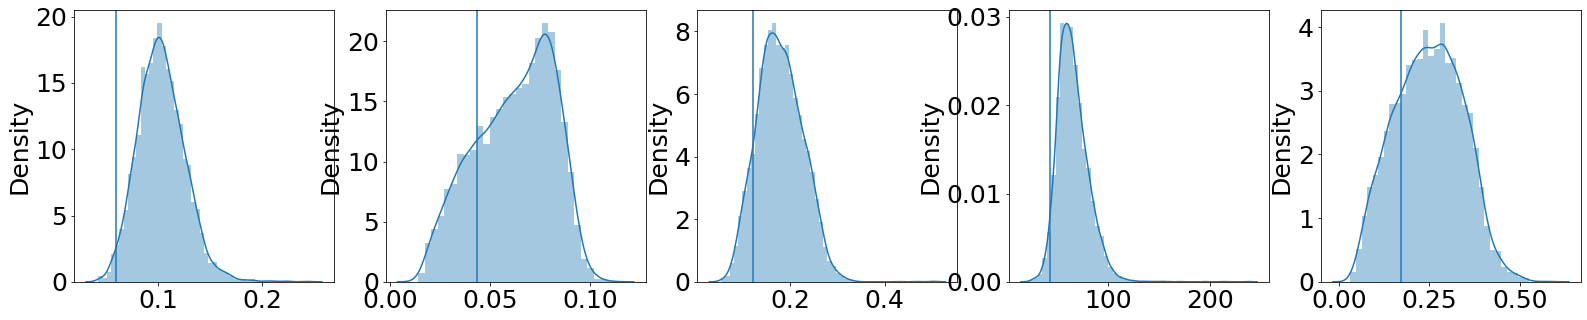

In [198]:
# preds = model.predict(test[0], eX=test[1], apply_bias=False, apply_calibration=False)
# preds = np.stack(
#     Parallel(n_jobs=-1)(
#         delayed(scaler.inverse_transform)(i) for i in tqdm(preds.transpose(2, 0, 1))
#     )
# ).transpose(1, 2, 0)
fig, ax = plt.subplots(1, 5, figsize=(27, 5))
biases = np.std(test[2][:, :, None] - preds, axis=-1)
for i in range(5):
    sns.distplot(biases[:, i], ax=ax[i])
    ax[i].axvline(residual.std(axis=0)[i])
# print(residual.mean(axis=0), residual.std(axis=0))

In [ ]:
[-0.02326681  0.00960102 -0.01935564  4.25218948] 
[1.70767914e-01 6.02543762e-02 2.47476102e-01 9.57404853e+01]

[-0.02017724  0.01066377 -0.02513224  5.17537488] 
[1.48282482e-01 5.84669137e-02 2.71683376e-01 9.68799713e+01]

[ 2.40131426e-03 -2.87982344e-04 -7.01090197e-04  6.50015097e-01] 
[1.12829287e-01 4.98892608e-02 1.84140773e-01 1.00399463e+02]

[ 0.0031449  -0.00141989  0.00207491  0.07292337] 
[1.20413546e-01 5.14423576e-02 1.96100314e-01 1.00057718e+02]

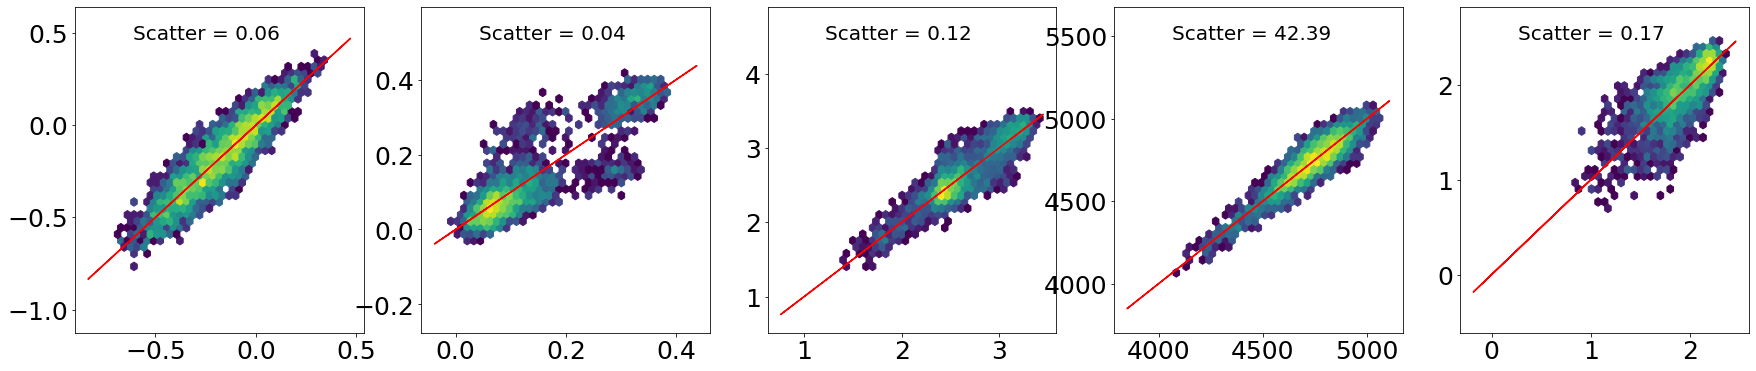

In [199]:
fig, ax = plt.subplots(1, 5, figsize=(30, 6))
for i in range(5):
    ax[i].hexbin(
        test[2][:, i],
        preds[:, i, 0],
        gridsize=40,
        mincnt=5,
        norm=matplotlib.colors.LogNorm(),
    )
    ax[i].plot(test[2][:, i], test[2][:, i], c="r", zorder=5)
    ax[i].annotate(
        f"Scatter = {residual.std(axis=0)[i]:.2f}",
        (0.2, 0.9),
        xycoords="axes fraction",
        fontsize=20,
    )

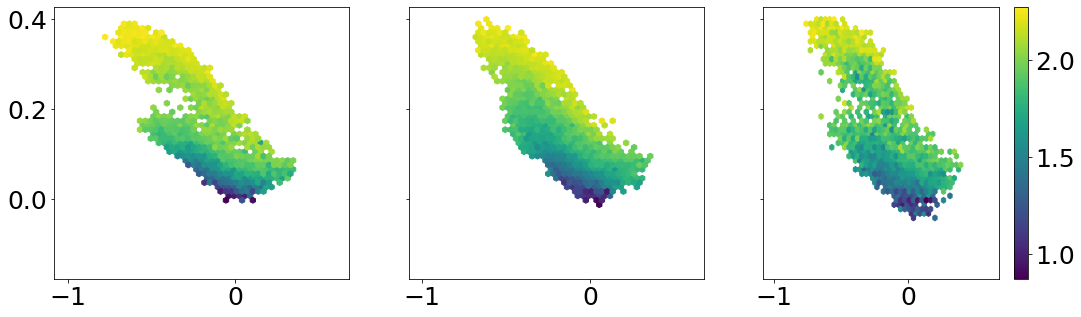

In [184]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5), sharey=True, sharex=True)
args = dict(gridsize=50, mincnt=2, extent=[-1.0, 0.6, -0.15, 0.4])
ax[0].hexbin(test[2][:, 0], test[2][:, 1], C=test[2][:, 4], **args)
ax[1].hexbin(
    preds[:, 0].mean(axis=-1),
    preds[:, 1].mean(axis=-1),
    C=preds[:, 4].mean(axis=-1),
    **args
)
hb = ax[2].hexbin(preds[:, 0, 0], preds[:, 1, 0], C=preds[:, 4].mean(axis=-1), **args)
plt.colorbar(hb, ax=ax[2])

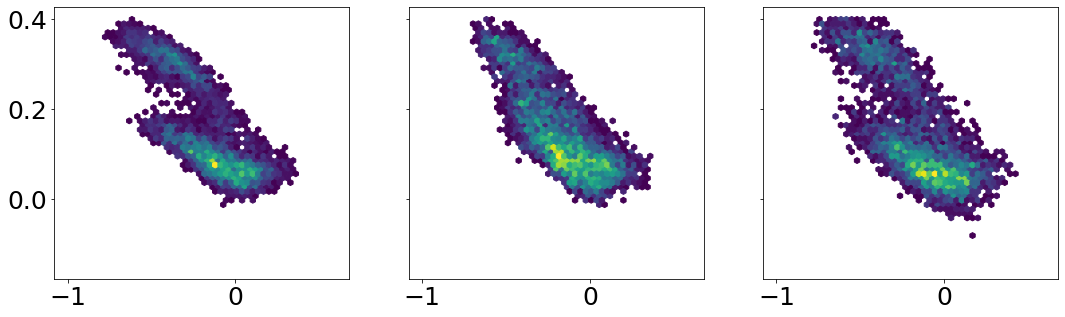

In [186]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5), sharey=True, sharex=True)
args = dict(gridsize=50, mincnt=2, extent=[-1.0, 0.6, -0.15, 0.4])
ax[0].hexbin(test[2][:, 0], test[2][:, 1], **args)
ax[1].hexbin(preds[:, 0].mean(axis=-1), preds[:, 1].mean(axis=-1), **args)
ax[2].hexbin(preds[:, 0, 0], preds[:, 1, 0], **args)

(3.7, 0.8)

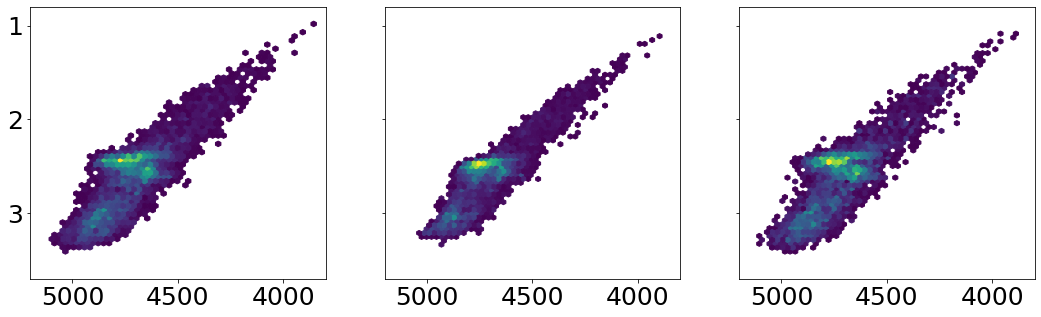

In [37]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5), sharey=True, sharex=True)
args = dict(gridsize=50, mincnt=2)
ax[0].hexbin(test[2][:, 3], test[2][:, 2], **args)
ax[1].hexbin(preds[:, 3].mean(axis=-1), preds[:, 2].mean(axis=-1), **args)
ax[2].hexbin(preds[:, 3, 0], preds[:, 2, 0], **args)

for a in ax:
    a.invert_xaxis()
    a.invert_yaxis()
ax[0].set_xlim(5200, 3800)
ax[0].set_ylim(3.7, 0.8)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_ylim(ax[0].get_ylim())
ax[2].set_xlim(ax[0].get_xlim())
ax[2].set_ylim(ax[0].get_ylim())

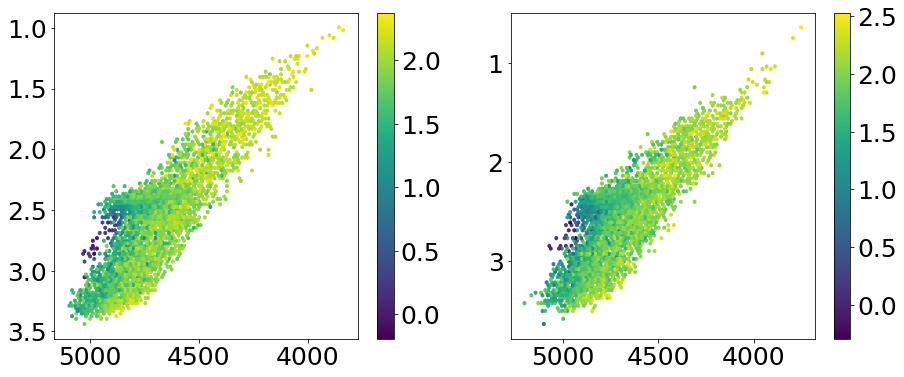

In [189]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

hb0 = ax[0].hexbin(test[2][:, 3], test[2][:, 2], C=test[2][:, -1])
plt.colorbar(hb0, ax=ax[0])
hb1 = ax[1].hexbin(preds[:, 3, 0], preds[:, 2, 0], C=preds[:, -1, 0])
plt.colorbar(hb1, ax=ax[1])

for a in ax:
    a.invert_xaxis()
    a.invert_yaxis()
# ax[0].set_xlim(5200, 3800)
# ax[0].set_ylim(3.7, 0.8)
# ax[1].set_xlim(ax[0].get_xlim())
# ax[1].set_ylim(ax[0].get_ylim())

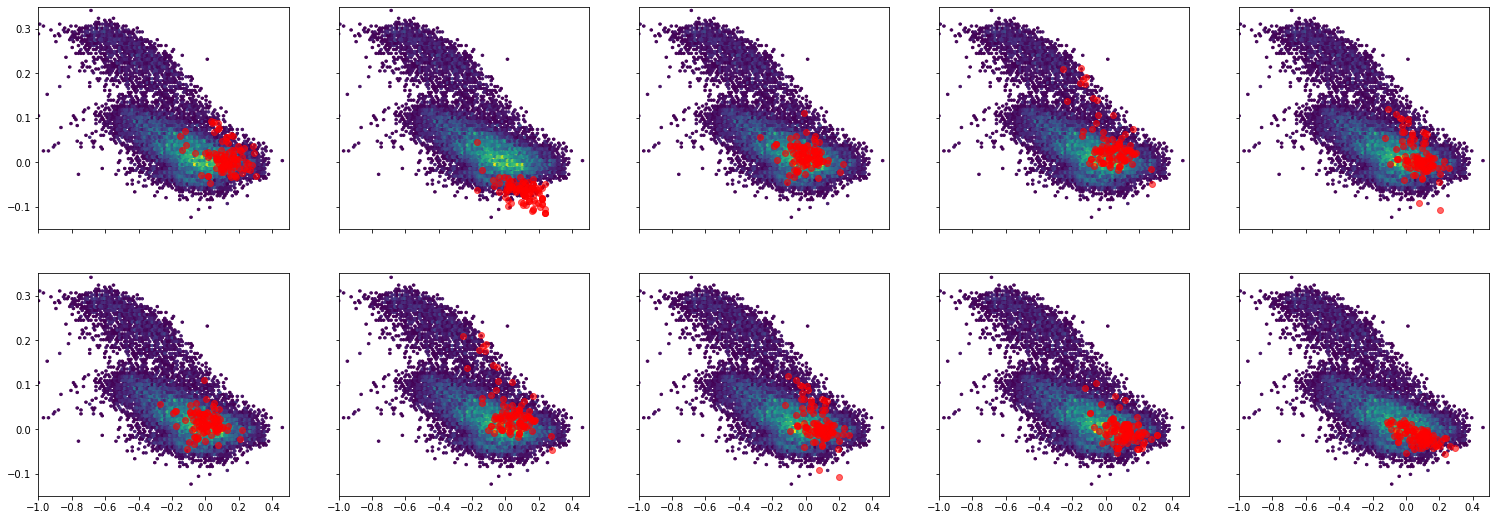

In [53]:
fig, ax = plt.subplots(2, 5, figsize=(26, 9), sharex=True, sharey=True)
sortidx = np.argsort((test[2][:, 0] - --0.1) ** 2)
args = dict(extent=[-1.0, 0.5, -0.15, 0.35], mincnt=5)
for i in range(2):
    for j in range(5):
        idx = i * 2 + j
        ax[i][j].scatter(
            preds[sortidx[idx]][0], preds[sortidx[idx]][1], alpha=0.6, c="r", zorder=5
        )
        ax[i][j].hexbin(preds[:, 0, 0], preds[:, 1, 0], **args)
        ax[i][j].set_xlim(-1.0, 0.5)
        ax[i][j].set_ylim(-0.15, 0.35)

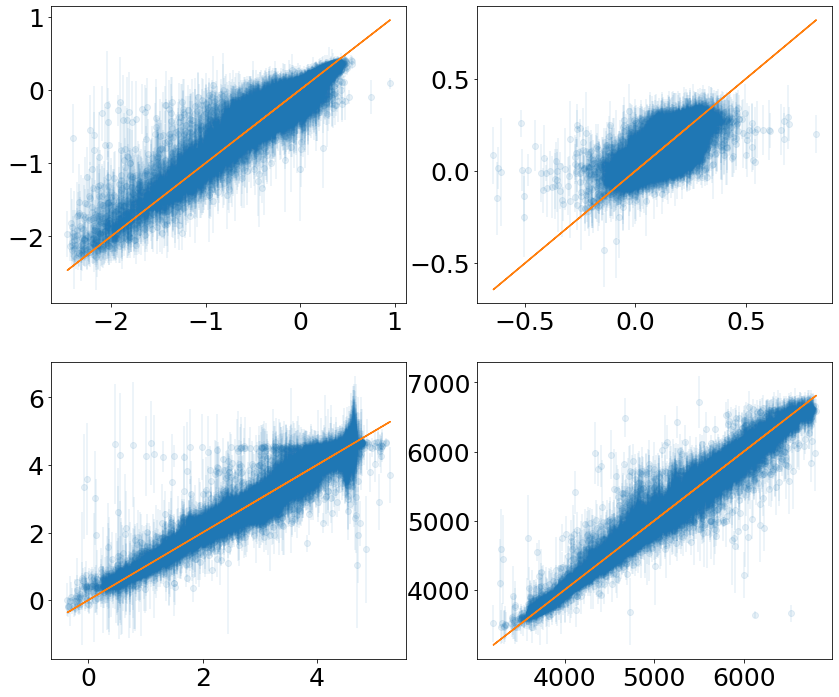

In [84]:
fig, ax = plt.subplots(2, 2, figsize=(14, 12))
# plt.hist2d(
#     test[2].flatten(),
#     np.median(preds, axis=1),
#     # yerr=preds.std(axis=1),
#     # ls="none",
#     # marker="o",
#     # alpha=0.2,
#     # extent=[-1, 0.5, -1, 1],
#     bins=(200, 200),
#     norm=matplotlib.colors.LogNorm(),
# )
for i in range(2):
    for j in range(2):
        idx = i * 2 + j
        ax[i][j].errorbar(
            test[2][:, idx].flatten(),
            np.median(preds, axis=-1)[:, idx],
            yerr=preds.std(axis=-1)[:, idx],
            ls="none",
            marker="o",
            alpha=0.1,
            # extent=[-1, 0.5, -1, 1],
            # bins=(200, 200),
            # norm=matplotlib.colors.LogNorm(),
        )
        ax[i][j].plot(test[2][:, idx].flatten(), test[2][:, idx].flatten(), zorder=5)
# plt.xlim(-1, 0.5)
# plt.ylim(-1, 1)

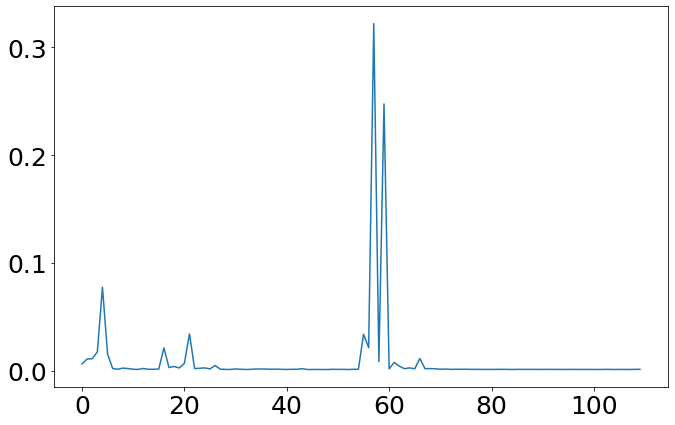

In [43]:
plt.plot(model.feature_importances_)

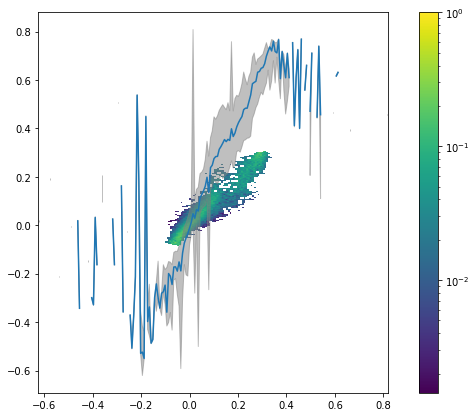

In [311]:
plt.figure(figsize=(11, 7))

axis = 0

H, x_edges, y_edges = np.histogram2d(
    test[2].flatten(), np.median(preds, axis=1), bins=(200, 200)
)
x_bins = (x_edges[1:] + x_edges[:-1]) / 2.0
y_bins = (y_edges[1:] + y_edges[:-1]) / 2.0
H_norm = H / H.sum(axis=axis).reshape((-1, 1) if axis == 1 else (1, -1))
H_norm[H_norm < 1e-3] = np.nan

plt.imshow(
    H_norm.T,
    norm=matplotlib.colors.LogNorm(),
    origin="lower",
    extent=[x_edges.min(), x_edges.max(), y_edges.min(), y_edges.max()],
)
if axis == 1:
    mean = np.nansum(H_norm.T * x_bins, axis=1) / np.nansum(H_norm.T, axis=1)
else:
    mean = np.nansum(H_norm * y_bins, axis=1) / np.nansum(H_norm, axis=1)
# plt.plot(x_bins if axis == 0 else y_bins, mean, c="r", zorder=5, lw=2)

cdf = np.nancumsum(H_norm if axis == 0 else H_norm.T, axis=1) / np.nansum(
    H_norm if axis == 0 else H_norm.T, axis=1
).reshape(-1, 1)
# plt.plot(cdf, x_bins)
vals = []
for c in cdf:
    vals.append(np.interp([0.16, 0.5, 0.84], c, x_bins if axis == 0 else y_bins))
vals = np.stack(vals).T
plt.plot(x_bins if axis == 0 else y_bins, vals[1])
plt.fill_between(
    x_bins if axis == 0 else y_bins, vals[0], vals[2], alpha=0.5, color="gray"
)
plt.colorbar()

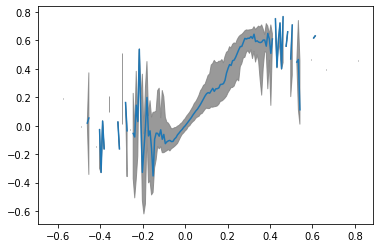

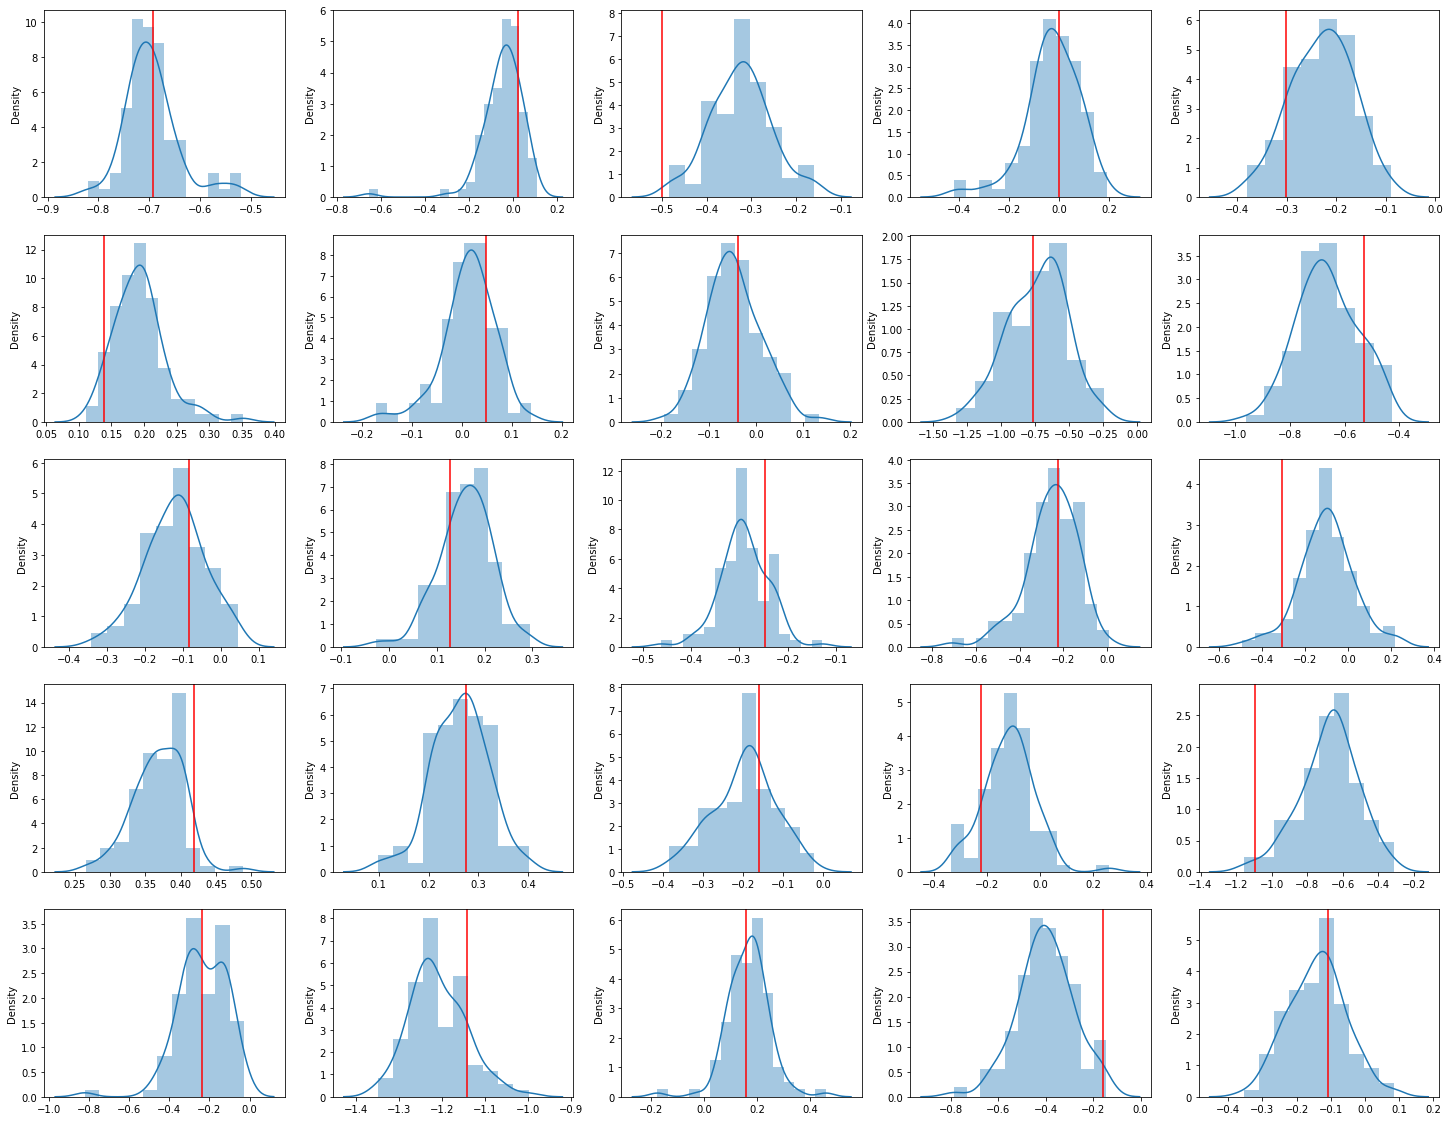

In [85]:
fig = plt.figure(figsize=(25, 20))

for i in range(5):
    for j in range(5):
        idx = i * 5 + j + 1
        ax = fig.add_subplot(5, 5, idx)
        sns.distplot(preds[idx].flatten(), ax=ax)
        ax.axvline(test[2][idx], c="r")

In [25]:
preds.std(axis=1).mean()

0.09302233478558747